In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [110]:
# df = pd.read_csv("../0.Datasets/processed/processed_car_data.csv").iloc[:1000]
df = pd.read_csv("../0.Datasets/processed/sliced_car_data.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Chevrolet,Impala,LTZ,Sedan,automatic,2g1165s30f9103921,ca,19.000000,14538.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24300.0,7200.0,Tue,2015-07-07 09:30:00
1,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.000000,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue,2015-02-03 04:30:00
2,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,30.672365,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue,2014-12-16 12:00:00
3,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff7f1002327,ca,49.000000,5826.0,gray,black,audi north scottsdale,24000.0,23750.0,Thu,2014-12-18 12:30:00
4,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,38.000000,10736.0,black,black,the hertz corporation,67000.0,65000.0,Tue,2015-01-06 12:30:00


In [111]:
x = df[['mmr', 'sellingprice','condition']]
x

,mmr,sellingprice,condition
0,24300.0,7200.0,19.000000
1,34200.0,30000.0,29.000000
2,20100.0,14700.0,30.672365
3,24000.0,23750.0,49.000000
4,67000.0,65000.0,38.000000
5,15150.0,8500.0,30.672365
6,32100.0,32500.0,42.000000
7,32300.0,32500.0,48.000000
8,50400.0,34000.0,30.672365
9,22200.0,19500.0,42.000000


In [112]:
y = df['make']
y

0     Chevrolet
1           BMW
2     Chevrolet
3          Audi
4           BMW
5       Hyundai
6         Volvo
7         Volvo
8           BMW
9     Chevrolet
10    Chevrolet
11         Audi
12          Kia
13         Audi
14          Kia
15        Buick
16    Chevrolet
17          BMW
18          BMW
19          BMW
Name: make, dtype: object

In [113]:
x_train,  x_test,y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 42)

In [114]:
log_reg = LogisticRegression(multi_class='multinomial', max_iter= 1000, solver='lbfgs')

strat_time = time.time()

log_reg.fit(x_train, y_train)

end_time = time.time()

print(f"execution time {end_time - strat_time}")



c:\Users\AjayPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


execution time 0.40714383125305176


c:\Users\AjayPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
ypredict = log_reg.predict(x_test)
ypredict

array(['BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'Chevrolet'], dtype=object)

In [116]:
y_test

0     Chevrolet
17          BMW
15        Buick
1           BMW
8           BMW
5       Hyundai
Name: make, dtype: object

In [117]:
print(accuracy_score(y_test, ypredict))

0.5


In [118]:
matrix = confusion_matrix(y_test, ypredict)
matrix

array([[3, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]], dtype=int64)

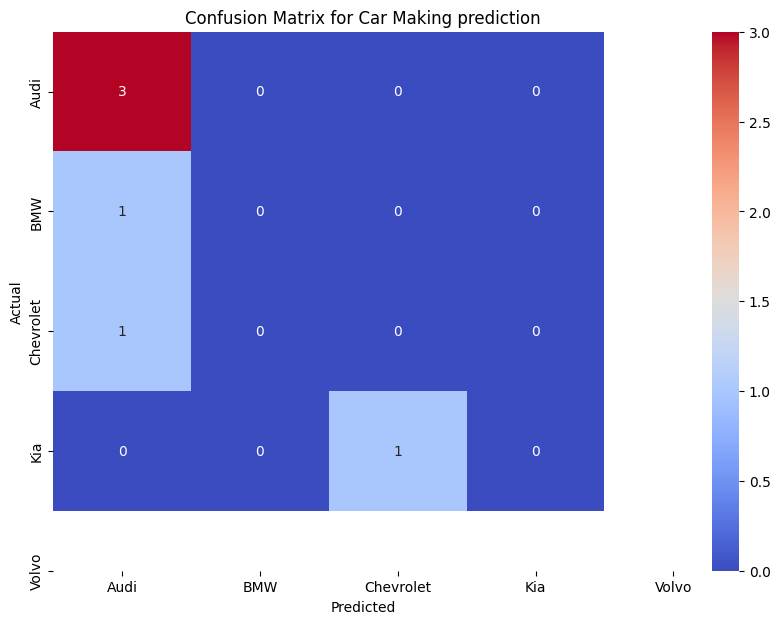

In [119]:
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Car Making prediction')
plt.show()

In [120]:
report = classification_report(y_test, ypredict,  zero_division= 1, output_dict=True,)
print(report)

{'BMW': {'precision': 0.6, 'recall': 1.0, 'f1-score': 0.75, 'support': 3.0}, 'Buick': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'Chevrolet': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'Hyundai': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'accuracy': 0.5, 'macro avg': {'precision': 0.65, 'recall': 0.25, 'f1-score': 0.1875, 'support': 6.0}, 'weighted avg': {'precision': 0.6333333333333333, 'recall': 0.5, 'f1-score': 0.375, 'support': 6.0}}


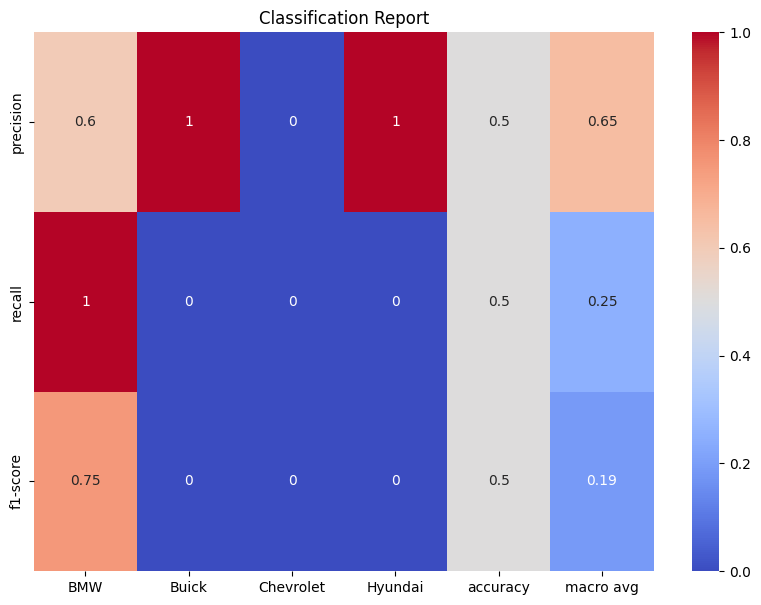

In [121]:
report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 7))
sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

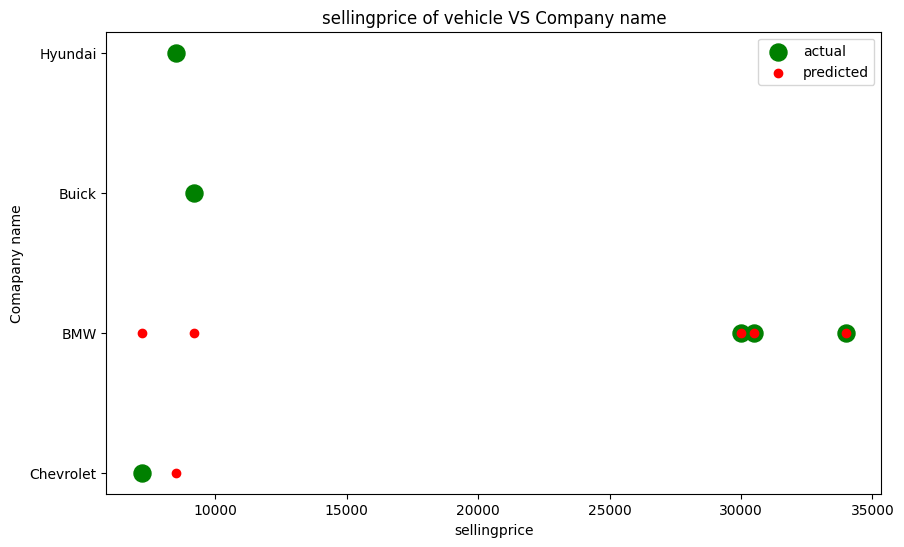

In [122]:


plt.figure(figsize = (10,6))

plt.scatter(x_test['sellingprice'], y_test, label ='actual', color='green', s =150)
plt.scatter(x_test['sellingprice'], ypredict, label= 'predicted', color = 'red')

plt.xlabel('sellingprice')
plt.ylabel('Comapany name')
plt.title("sellingprice of vehicle VS Company name")

plt.legend()
# plt.grid()
plt.savefig("./Graph/2.company_name_on_SellPrice.png")
plt.show()